In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns



In [2]:
ds = xr.open_dataset('ClimProjAll.nc')

In [ ]:
len(ds['site'])

In [ ]:
ds['site'].values[0]

In [ ]:
cmap = matplotlib.colors.Colormap('cmap',13)

In [10]:
colors = cm.rainbow(np.linspace(0, 1, 13))
current_palette = sns.color_palette("Set2",n_colors=13)

In [8]:
len(current_palette)

13

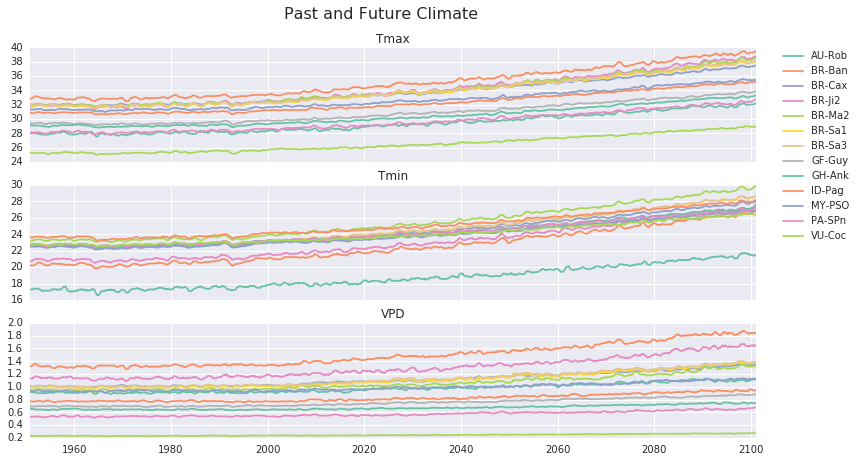

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
f.set_size_inches(13,7)
for i in np.arange(0,len(ds['site']),1):
    
    data = ds.isel(site=i)

    data = data.mean('gcm')
    tmax = data['tmax']
    tmin = data['tmin']
    vpd = data['vpd']

    tmax = tmax.to_dataframe()
    tmin = tmin.to_dataframe()
    vpd = vpd.to_dataframe()

    tmax = tmax.rolling(window=12).mean()
    tmin = tmin.rolling(window=12).mean()
    vpd = vpd.rolling(window=12).mean()

    #f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    ax1.plot(tmax, label=ds['site'].values[i], color=current_palette[i])
    ax1.set_title('Tmax')
    ax2.plot(tmin, label=ds['site'].values[i], color=current_palette[i])
    ax2.set_title('Tmin')
    ax3.plot(vpd, label=ds['site'].values[i], color=current_palette[i])
    ax3.set_title('VPD')
    
plt.legend(bbox_to_anchor=(1.01, .91),bbox_transform=plt.gcf().transFigure)
plt.suptitle('Past and Future Climate', size=16)
plt.savefig('rough_climatefigure_GB_12m_mean.png', dpi=300, bbox_inches='tight')

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(r.mean())
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')